In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dataclasses import dataclass, asdict
from datetime import date

In [31]:
@dataclass
class Assets:
    date: date
    
    # Cash and cash equivalents
    cash: int = 0
    # Short-term investments
    short_term: int = 0
    # Accounts receivable, net
    receivables: int = 0
    # Other current receivables, net..
    other_receivables: int = 0
    # Prepaid expenses and other current assets
    prepaid: int = 0
    others: int = 0

    def total(self):
        return self.cash + self.short_term + self.receivables + self.other_receivables + self.prepaid + self.others

    def total_receivables(self):
        return self.receivables + self.other_receivables

    def total_cash(self):
        return self.cash + self.short_term


@dataclass
class Liabilities:
    date: date
    
    # Any sort of accounts payable and accrued liabilities
    payables: int = 0
    # Short-term borrowings and current maturities of long-term debt
    short_term: int = 0
    # Unearned revenues
    unearned: int = 0
    # Other current liabilities
    others: int = 0

    def total(self):
        return self.payables + self.short_term + self.unearned + self.others

# UNH

In [32]:
unh_25q2_curr_assets = Assets(
    date = date(2025, 6, 30),
    cash = 28_596,
    short_term = 3_424,
    receivables = 24_142,
    other_receivables = 28_582,
    prepaid = 8_955
)

unh_24q4_curr_assets = Assets(
    date = date(2024, 12, 31),
    cash = 25_312,
    short_term = 3_801,
    receivables = 22_365,
    other_receivables = 26_089,
    prepaid = 8_212
)

In [33]:
unh_25q2_curr_liabilities = Liabilities(
    date = date(2025, 6, 30),
    payables = 38_427 + 34_330, # Medical + accounts payable
    short_term = 5_698,
    unearned = 3_032,
    others = 29_294,
)

unh_24q4_curr_liabilities = Liabilities(
    date = date(2024, 12, 31),
    payables = 34_224 + 34_337, # Medical + accounts payable
    short_term = 4_545,
    unearned = 3_317,
    others = 27_346,
)

In [97]:
def plot_asset_composition_comp(assets_new, assets_old, label_new='2025 Q2', label_old='2024 Q4'):
    def get_proportions(assets):
        total = assets.total()
        return {
            'Cash': (assets.cash + assets.short_term) / total,
            'Receivables': (assets.receivables + assets.other_receivables ) / total,
            'Prepaid': assets.prepaid / total
        }

    props_new = get_proportions(assets_new)
    props_old = get_proportions(assets_old)
    
    categories = list(props_new.keys())
    new_values = list(props_new.values())
    old_values = list(props_old.values())
    
    x = range(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar([i - width/2 for i in x], new_values, width, label=label_new)
    ax.bar([i + width/2 for i in x], old_values, width, label=label_old)
    
    ax.set_ylabel('Proportion of Total Assets')
    ax.set_title('Asset Composition Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    print(f'{label_new}: {new_values}')
    print(f'{label_old}: {old_values}')


def plot_current_liabilities(liabilities_new, liabilities_old, label_new='2025 Q2', label_old='2024 Q4'):
    def get_proportions(liabilities):
        total = liabilities.total()
        return {
            'Payables': liabilities.payables / total,
            'Short-term debt': liabilities.short_term / total,
            'Unearned': liabilities.unearned / total,
            'Others': liabilities.others / total
        }
    
    props_new = get_proportions(liabilities_new)
    props_old = get_proportions(liabilities_old)
    
    categories = list(props_new.keys())
    new_values = list(props_new.values())
    old_values = list(props_old.values())
    
    x = range(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar([i - width/2 for i in x], new_values, width, label=label_new)
    ax.bar([i + width/2 for i in x], old_values, width, label=label_old)
    
    ax.set_ylabel('Proportion of Total Liabilities')
    ax.set_title('Liability Composition Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    print(f'{label_new}: {new_values}')
    print(f'{label_old}: {old_values}')

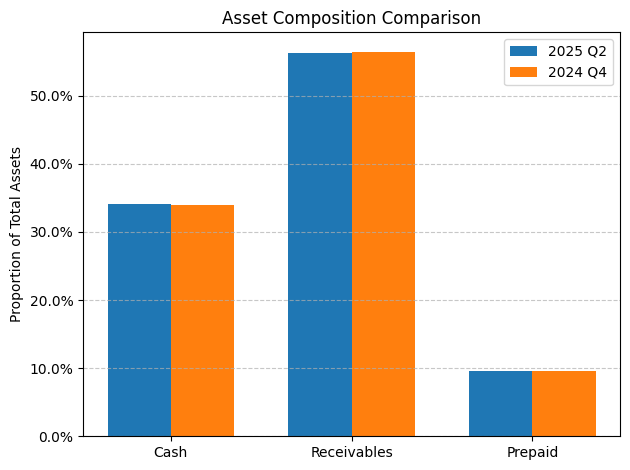

2025 Q2: [0.34173256918430295, 0.5626954396525043, 0.09557199116319277]
2024 Q4: [0.3393954231222094, 0.5648701896734633, 0.0957343872043274]


In [98]:
plot_asset_composition_comp(unh_25q2_curr_assets, unh_24q4_curr_assets, label_new='2025 Q2', label_old='2024 Q4')

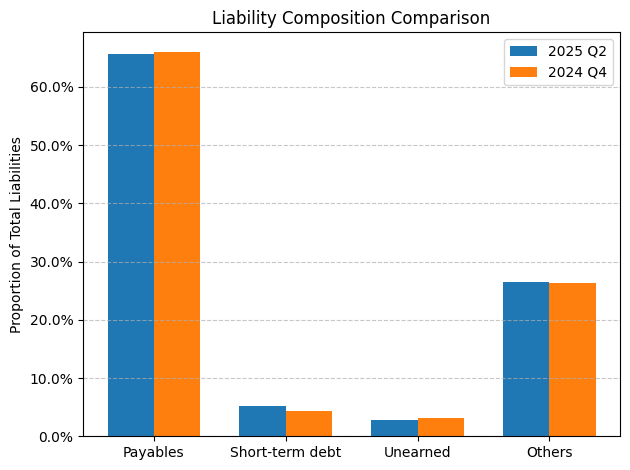

2025 Q2: [0.6567642465765791, 0.051434812828914704, 0.02736931423258501, 0.26443162636192125]
2024 Q4: [0.6607079185498559, 0.043799207855910724, 0.031965230463818675, 0.26352764313041466]


In [99]:
plot_current_liabilities(unh_25q2_curr_liabilities, unh_24q4_curr_liabilities, label_new='2025 Q2', label_old='2024 Q4')

In [100]:
unh_25q2_curr_assets.total_receivables() / unh_25q2_curr_liabilities.payables

0.7246587957172506

In [101]:
unh_24q4_curr_assets.total_receivables() / unh_24q4_curr_liabilities.payables

0.7067283149312291

# BKNG

In [102]:
bkng_25q2_curr_assets = Assets(
    date = date(2025, 6, 30),
    cash = 17_595,
    short_term = 0,
    receivables = 4_370,
    other_receivables = 0,
    prepaid = 626,
    others = 672,
)

bkng_24q4_curr_assets = Assets(
    date = date(2024, 12, 31),
    cash = 16_164,
    short_term = 0,
    receivables = 3_199,
    other_receivables = 0,
    prepaid = 587,
    others = 541,
)

bkng_25q2_curr_liabilities = Liabilities(
    date = date(2025, 6, 30),
    payables = 4_280,
    short_term = 999,
    unearned = 9_149,
    others = 4_208,
)

bkng_24q4_curr_liabilities = Liabilities(
    date = date(2024, 12, 31),
    payables = 3_824,
    short_term = 1_745,
    unearned = 4_031,
    others = 6_047,
)

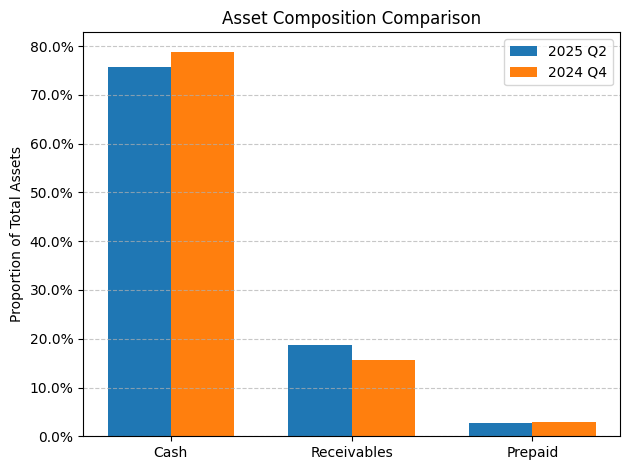

2025 Q2: [0.7563512874521773, 0.1878519537462924, 0.026909684907363625]
2024 Q4: [0.7888341222975941, 0.15611731979893612, 0.0286467229515397]


In [103]:
plot_asset_composition_comp(bkng_25q2_curr_assets, bkng_24q4_curr_assets, label_new='2025 Q2', label_old='2024 Q4')

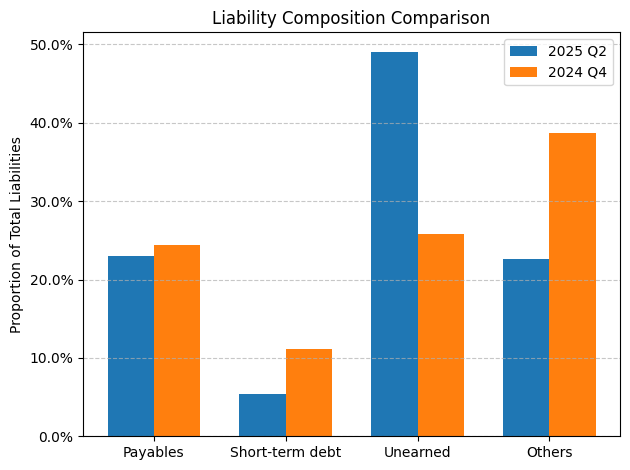

2025 Q2: [0.22966301781498175, 0.05360592401802962, 0.4909315303713243, 0.2257995277956643]
2024 Q4: [0.24439189621013613, 0.1115229756502844, 0.2576212692528919, 0.38646385888668755]


In [104]:
plot_current_liabilities(bkng_25q2_curr_liabilities, bkng_24q4_curr_liabilities, label_new='2025 Q2', label_old='2024 Q4')

In [105]:
bkng_25q2_curr_assets.total_receivables() / bkng_25q2_curr_liabilities.payables

1.0210280373831775

In [106]:
bkng_24q4_curr_assets.total_receivables() / bkng_24q4_curr_liabilities.payables

0.8365585774058577

# Extending our analysis

In [127]:
def add_asset_groupings(df):
    df = df.copy()
    df['total_cash'] = df['cash'] + df['short_term']
    df['total_receivables'] = df['receivables'] + df['other_receivables']
    return df


unh_assets_data = {
    '2025 Q2': unh_25q2_curr_assets,
    '2024 Q4': unh_24q4_curr_assets,
}


unh_assets_df = pd.DataFrame({period: asdict(assets) for period, assets in unh_assets_data.items()}).T
unh_assets_data = unh_assets_df.sort_values('date')

unh_assets_df = add_asset_groupings(unh_assets_df)

unh_assets_df

,date,cash,short_term,receivables,other_receivables,prepaid,others,total_cash,total_receivables
2025 Q2,2025-06-30,28596,3424,24142,28582,8955,0,32020,52724
2024 Q4,2024-12-31,25312,3801,22365,26089,8212,0,29113,48454


In [128]:
bkng_assets_data = {
    '2025 Q2': bkng_25q2_curr_assets,
    '2024 Q4': bkng_24q4_curr_assets,
}


bkng_assets_df = pd.DataFrame({period: asdict(assets) for period, assets in bkng_assets_data.items()}).T
bkng_assets_data = bkng_assets_df.sort_values('date')

bkng_assets_df = add_asset_groupings(bkng_assets_df)

bkng_assets_df

,date,cash,short_term,receivables,other_receivables,prepaid,others,total_cash,total_receivables
2025 Q2,2025-06-30,17595,0,4370,0,626,672,17595,4370
2024 Q4,2024-12-31,16164,0,3199,0,587,541,16164,3199


In [133]:
unh_liabilities_data = {
    '2025 Q2': unh_25q2_curr_liabilities,
    '2024 Q4': unh_24q4_curr_liabilities,
}

unh_liabilities_df = pd.DataFrame({period: asdict(liabilities) for period, liabilities in unh_liabilities_data.items()}).T
#unh_liabilities_df = unh_liabilities_df.sort_values('date')
unh_liabilities_df

,date,payables,short_term,unearned,others
2025 Q2,2025-06-30,72757,5698,3032,29294
2024 Q4,2024-12-31,68561,4545,3317,27346


In [135]:
bkng_liabilities_data = {
    '2025 Q2': bkng_25q2_curr_liabilities,
    '2024 Q4': bkng_24q4_curr_liabilities,
}

bkng_liabilities_df = pd.DataFrame({period: asdict(liabilities) for period, liabilities in bkng_liabilities_data.items()}).T
#bkng_liabilities_df = bkng_liabilities_df.sort_values('date')
bkng_liabilities_df

,date,payables,short_term,unearned,others
2025 Q2,2025-06-30,4280,999,9149,4208
2024 Q4,2024-12-31,3824,1745,4031,6047


In [136]:
def plot_metrics_comparison(df, columns, title):
    # Calculate proportions for specified columns only.
    plot_data = df[columns]
    totals = plot_data.sum(axis=1)
    props = plot_data.div(totals, axis=0)
    
    # Transpose - now metrics are rows, quarters are columns.
    props_transposed = props.T

    print(props_transposed)
    
    # Plot.
    ax = props_transposed.plot(kind='bar', figsize=(6, 4))
    ax.set_title(title)
    ax.set_ylabel('Proportion')
    ax.tick_params(axis='x', rotation=45)  # Rotate metric names.
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

                    2025 Q2   2024 Q4
total_cash         0.341733  0.339395
total_receivables  0.562695   0.56487
prepaid            0.095572  0.095734


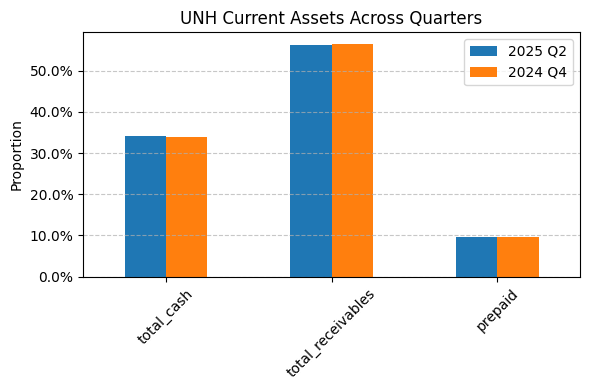

In [137]:
plot_metrics_comparison(
    unh_assets_df, 
    ['total_cash', 'total_receivables', 'prepaid'],
    'UNH Current Assets Across Quarters'
)

                    2025 Q2   2024 Q4
total_cash         0.756351  0.788834
total_receivables  0.187852  0.156117
prepaid             0.02691  0.028647
others             0.028887  0.026402


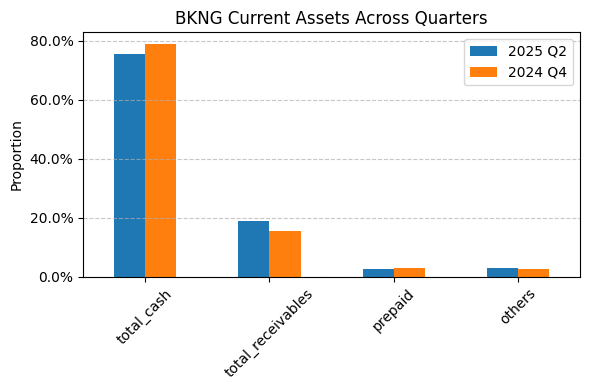

In [139]:
plot_metrics_comparison(
    bkng_assets_df,
    ['total_cash', 'total_receivables', 'prepaid', 'others'],
    'BKNG Current Assets Across Quarters'
)

             2025 Q2   2024 Q4
payables    0.656764  0.660708
short_term  0.051435  0.043799
unearned    0.027369  0.031965
others      0.264432  0.263528


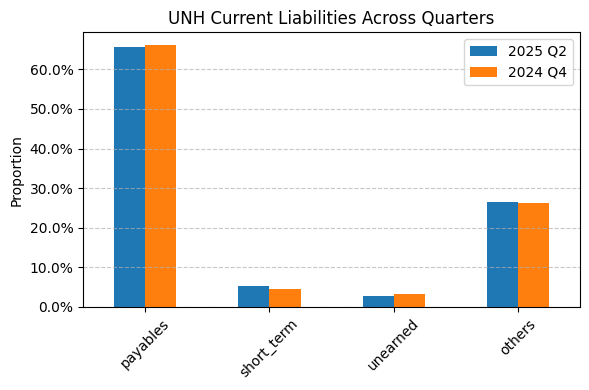

In [140]:
plot_metrics_comparison(
    unh_liabilities_df, 
    ['payables', 'short_term', 'unearned', 'others'],
    'UNH Current Liabilities Across Quarters'
)

             2025 Q2   2024 Q4
payables    0.229663  0.244392
short_term  0.053606  0.111523
unearned    0.490932  0.257621
others        0.2258  0.386464


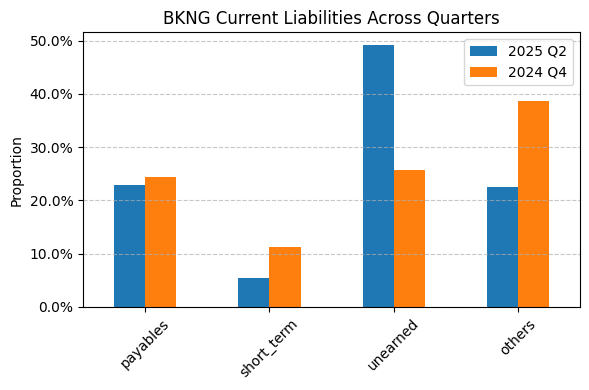

In [142]:
plot_metrics_comparison(
    bkng_liabilities_df, 
    ['payables', 'short_term', 'unearned', 'others'],
    'BKNG Current Liabilities Across Quarters'
)